In [2]:
#Setup
import pandas as pd
import numpy as np
import fbprophet as fbp
from sklearn.metrics import mean_absolute_error
from matplotlib.pyplot import plot as plt
import pickle
import timeit

In [1]:
#Data

#BT Thermal
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/Train_BT_Heat_Rate.csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/Test_BT_Heat_Rate.csv'

#GF Immersion
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/Train_Geroge_Fox_Immersion_Heat(KWh)_Rate.csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/Test_George_Fox_Immersion_Heat(KWh)_Rate.csv'

# Temperature
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/Train_George_Fox_temp(DegC).csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/Test_George_Fox_temp(DegC).csv'

#GF B27 Thermal
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/Train_George_Fox_Thermal(KWh)_Rate.csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/Test_George_Fox_Thermal(KWh)_Rate.csv'

# BT Oc
filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/BT_Oc_Train.csv'
filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/BT_Oc_Test.csv'

# Library Oc
#filepath1 = '/content/drive/MyDrive/Colab Notebooks/Data/Library_Train.csv'
#filepath2 = '/content/drive/MyDrive/Colab Notebooks/Data/Library_Test.csv'

train = pd.read_csv(filepath1)
test = pd.read_csv(filepath2)
train.head()

NameError: ignored

In [ ]:
#Data Manipulation
train.columns = ['timestamp','reading']
test.columns = ['timestamp','reading']
train.timestamp = pd.to_datetime(train.timestamp)
test.timestamp = pd.to_datetime(test.timestamp)
train.set_index('timestamp', inplace=True)
test.set_index('timestamp', inplace=True)
#train = train.resample('1H').asfreq()
#test = test.resample('1H').asfreq()
#train = train.resample('1H').sum()
#test = test.resample('1H').sum()
test.dropna(inplace=True)
train.dropna(inplace=True)
train.reset_index(inplace=True)
test.reset_index(inplace=True)
train.columns = ['ds','y'] # FB prohet needs the specific headings
test.columns = ['ds','y']
train.tail()

,ds,y
11443,2019-12-09 19:00:00,26992
11444,2019-12-09 20:00:00,25062
11445,2019-12-09 21:00:00,21944
11446,2019-12-09 22:00:00,15728
11447,2019-12-09 23:00:00,13128


In [ ]:
#Variables
fl = 48
freq = '1H'

#Model
start = timeit.default_timer() #Timer for model train speed

fbmodel = fbp.Prophet()
fbmodel.fit(train)

stop = timeit.default_timer()
print('Time: ', stop - start)  
future = fbmodel.make_future_dataframe(periods=fl, freq=freq)
forecast = fbmodel.predict(future)
fig1 = fbmodel.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Time:  9.770148851000044


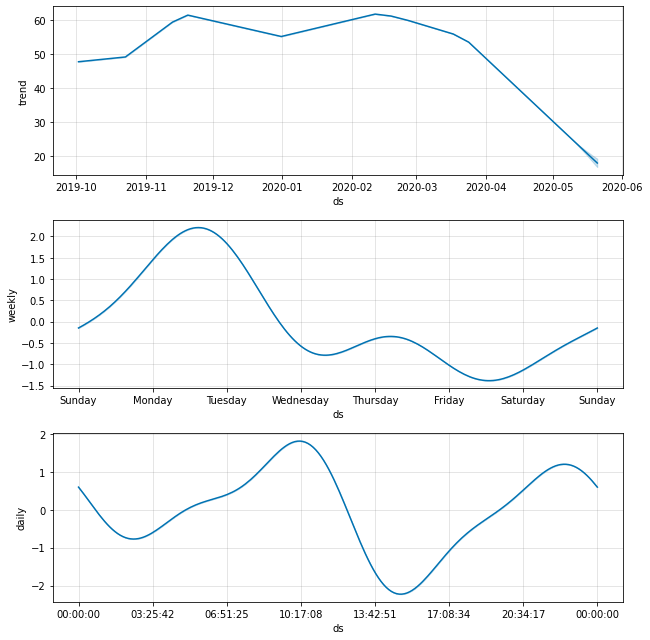

In [ ]:
fig2 = fbmodel.plot_components(forecast) #Prophet shows components of the model separately

In [ ]:
#MAE
mae = mean_absolute_error(plot.Reading.iloc[:fl], plot.Prediction.iloc[:fl])
mae

412.9739384102825

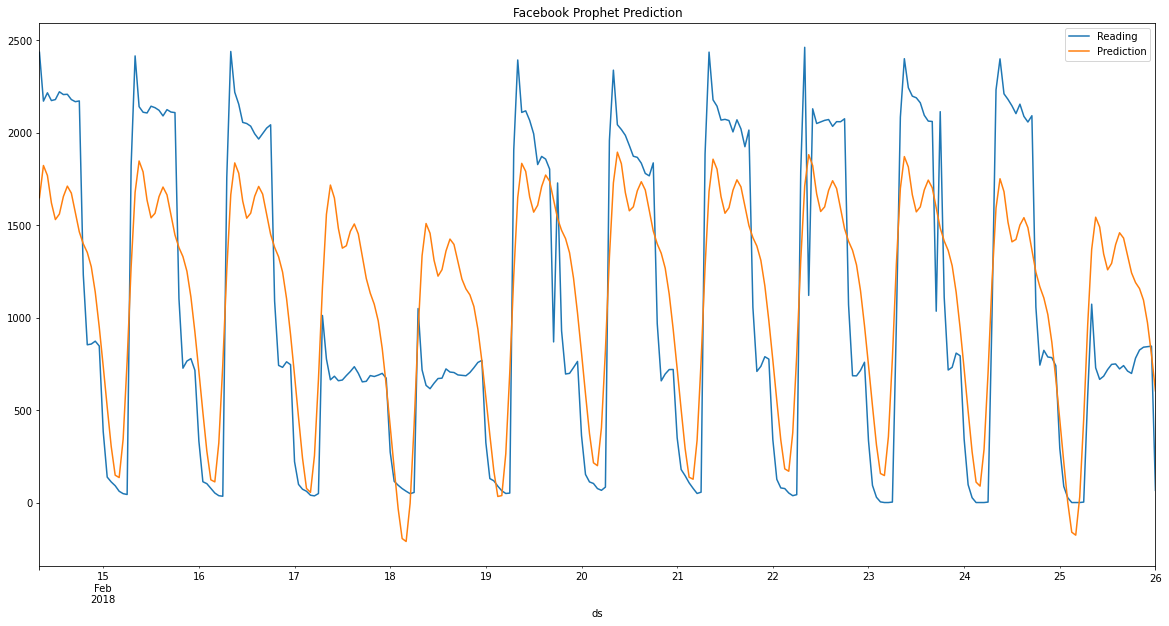

In [ ]:
#Visualisations
preds = forecast[['ds', 'yhat']].iloc[-fl:]
plot = test.merge(preds, on='ds')
plot.set_index('ds', inplace=True)
plot.columns = ['Reading', 'Prediction']
plot.plot(figsize=(20,10), title='Facebook Prophet Prediction')